Load environment variable from .env file with python-dotenv package

In [1]:
import os
from dotenv import load_dotenv # add this line

load_dotenv() # add this line

arcgis_user = os.getenv("ARCGIS_USER")
arcgis_pass = os.getenv("ARCGIS_PASS")
arcgis_portal = os.getenv("ARCGIS_PORTAL")

Make GIS object

In [2]:
from arcgis.gis import GIS
gis = GIS(arcgis_portal, arcgis_user, arcgis_pass)
gis

GIS @ https://pcovidjatim.maps.arcgis.com version:8.1

Load jatim layer item by id

<Item title:"Jawa Timur" type:Feature Layer Collection owner:prediksicovidjatim>
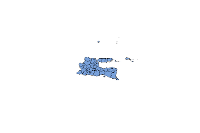

In [3]:
jatim_id = '2e29df69a57d4ca59f5c2a9fdf11217f'
jatim = gis.content.get(jatim_id)
jatim

Create feature layer collection

In [8]:
import arcgis.features
#jatim_flc = arcgis.features.FeatureLayerCollection(url, gis)
jatim_flc = arcgis.features.FeatureLayerCollection.fromitem(jatim)
jatim_flc

<FeatureLayerCollection url:"https://services2.arcgis.com/gxevpFKXaRT0UMCs/arcgis/rest/services/Jawa_Timur/FeatureServer">

In [10]:
jatim_flc.layers

[<FeatureLayer url:"https://services2.arcgis.com/gxevpFKXaRT0UMCs/arcgis/rest/services/Jawa_Timur/FeatureServer/0">]

In [12]:
jatim_flc.properties.syncEnabled

True

In [13]:
jatim_flc.properties.syncCapabilities

{
  "supportsAsync": true,
  "supportsRegisteringExistingData": true,
  "supportsSyncDirectionControl": true,
  "supportsPerLayerSync": true,
  "supportsPerReplicaSync": true,
  "supportsSyncModelNone": true,
  "supportsRollbackOnFailure": true,
  "supportsAttachmentsSyncDirection": true
}

We need sync and extract capability

In [14]:
jatim_flc.properties.capabilities

'Create,Delete,Query,Update,Editing,Extract,Sync,ChangeTracking'

List existing replicas

In [9]:
replica_list = jatim_flc.replicas.get_list()
len(replica_list)

0

Calculate the bounding box to make geometry filter

In [16]:
extents = jatim_flc.properties['fullExtent']
#csv?
extents_str = ",".join(format(x, "10.3f") for x in [extents['xmin'],extents['ymin'],extents['xmax'], extents['ymax']])
extents_str

'12345148.297,-981315.428,12942412.765,-562631.987'

Create geometry filter (it's a dict)

In [18]:
geom_filter = {'geometryType':'esriGeometryEnvelope'}
geom_filter.update({'geometry':extents_str})
geom_filter

{'geometryType': 'esriGeometryEnvelope',
 'geometry': '12345148.297,-981315.428,12942412.765,-562631.987'}

Create replica

In [20]:
replica1 = jatim_flc.replicas.create( replica_name = 'jatim_replica_1',
                                      layers='0',
                                      geometry_filter=geom_filter,
                                      sync_model="perLayer",
                                      target_type="server",
                                      data_format="sqlite",
                                      out_path=r'/arcgis/home')
replica1

{'replicaName': 'jatim_replica_1',
 'replicaID': '6d61a1f6-21a1-4b3e-8fee-b381f7706cd0',
 'targetType': 'server',
 'transportType': 'esriTransportTypeUrl',
 'responseUrl': 'https://services2.arcgis.com/gxevpFKXaRT0UMCs/arcgis/rest/services/Jawa_Timur/FeatureServer/replicafiles/82ae459390f14e9fbc971f5f3f8ad040.geodatabase'}

So.. what's a replica for?

In [21]:
map = gis.map("Jawa Timur", zoomlevel=8)
map.add_layer(replica1)
map

Exception: dict layers must have 'type' and 'url'

Eh. A replica of a layer can't be used as a layer. What is it for?